# Project Experimentation and Research

### Retrieving  Data

In [1]:
!unzip gcloud_data/dataset.zip/data.zip

Archive:  gcloud_data/dataset.zip/data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [2]:
# Importing Important Libraries
import pandas as pd
import seaborn as sns



In [3]:
imbal_data = pd.read_csv("dataset/imbalanced_data.csv")
imbal_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


We follow the following label interpretation:<br>
0 - No Hate<br>
1 - Hate

<hr>

## EDA

In [4]:
imbal_data.shape

(31962, 3)

In [5]:
imbal_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

There is no use or significance of "id" column. Let's drop the column.

In [6]:
imbal_data.drop("id", axis=1, inplace=True)
imbal_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<Axes: xlabel='label', ylabel='count'>

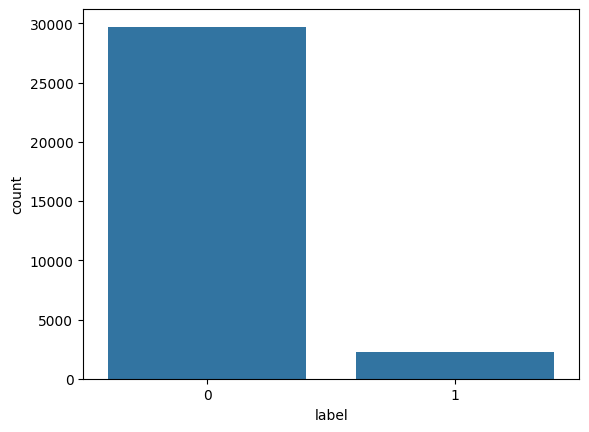

In [7]:
sns.countplot(data=imbal_data, x='label')

From the above graph, it's clear that the data is imbalanced. To balance out the data, let's import some additional data to balance the dataset.

In [8]:
raw_data = pd.read_csv("dataset/raw_data.csv")
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
raw_data.shape

(24783, 7)

In [10]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [11]:
raw_data.drop(raw_data.iloc[:, 0:5], axis=1, inplace=True)
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

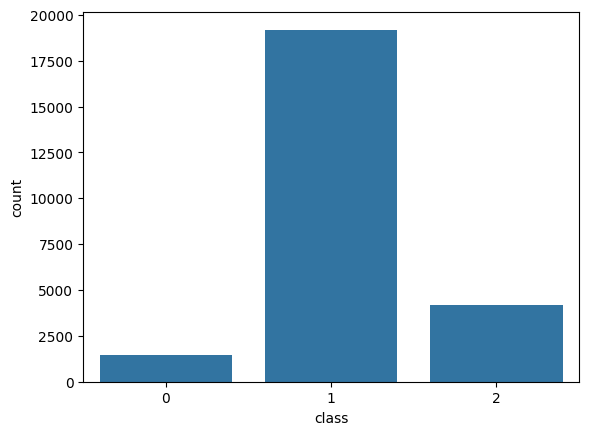

In [13]:
sns.countplot(data=raw_data, x='class')

Class 0 -> Hate<br>
Class 1 -> Abusive<br>
Class 2 -> No Hate<br>

Based on the project context, we consider Class 0 and Class 1 to be a type of hate speech. Thus we can combine the Class 0 and 1 together into Class 1

In [14]:
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [15]:
raw_data.loc[raw_data['class'] == 0, 'class'] = 1

# Alternative approach for the above code
# raw_data['class'].replace({0:1}, inplace=True)

print(raw_data['class'].unique())
raw_data.head()

[2 1]


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [16]:
raw_data['class'].value_counts()

class
1    20620
2     4163
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

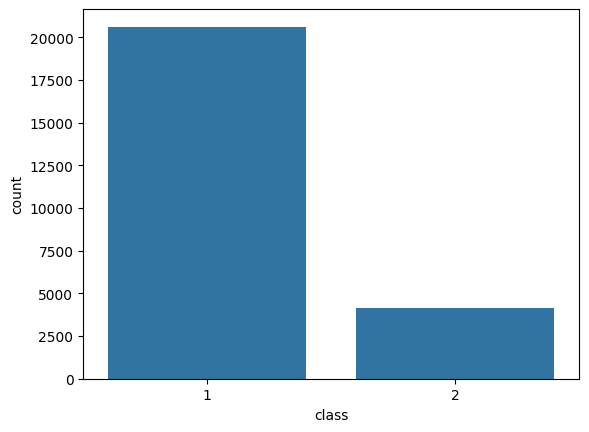

In [17]:
sns.countplot(data=raw_data, x='class')

Since we have "No Hate" labeled as 0 in imbalanced dataset, let's convert the label of "No Hate" in raw_data from '2' to '0'.

/var/folders/95/w1g1703d3d9b864tbbl9hnp80000gn/T/ipykernel_2481/3949659149.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0}, inplace=True)


<Axes: xlabel='class', ylabel='count'>

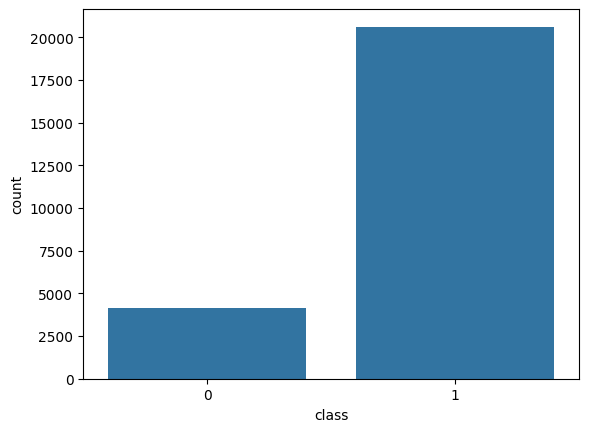

In [18]:
raw_data['class'].replace({2:0}, inplace=True)
sns.countplot(data=raw_data, x='class')

Additionally, the 'class' column in raw_data corresponds to the 'label' column in imbal_data. Therefore, let's align the column names.

In [19]:
raw_data.rename(columns={'class':'label'}, inplace=True)
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='label', ylabel='count'>

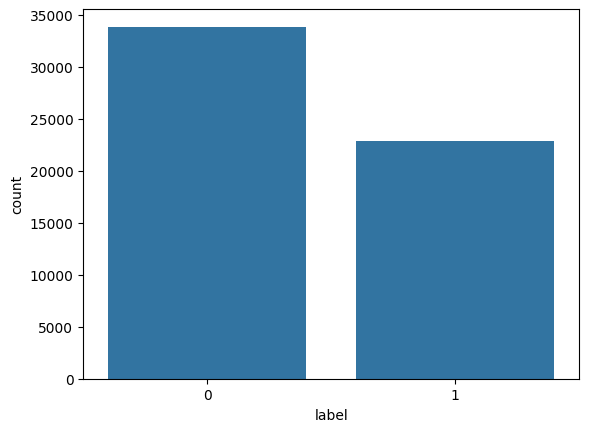

In [20]:
new_frame = [imbal_data, raw_data]
df = pd.concat(new_frame, ignore_index=True)

sns.countplot(data=df, x='label')

<hr>

## Preprocessing

In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishabh_hm/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [23]:
def sentence_cleaning(sentence):
    sentence = str(sentence).lower() # converts sentence into lower case
    # removes stopwords from sentence
    words = [word for word in sentence.split(' ') if word not in stopword]
    sentence = " ".join(words)
    # extracts rootwords from all words in the sentence
    words = [stemmer.stem(word) for word in sentence.split(' ')]
    sentence = " ".join(words)
    sentence = re.sub('\[.*?\]', '', sentence) # removes text inside [] brackets
    sentence = re.sub('https?://\S+www\.\S+', '', sentence) # removes URLs starting with http or https
    sentence = re.sub('<.*?>', '', sentence) # removes HTML Tags
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence) # removes all punctuations
    sentence = re.sub('\n', '', sentence) # removes all line brakes
    sentence = re.sub('\w*\d\w*', '', sentence) # removes all words that have number in them
    
    return sentence

In [24]:
df['tweet'] = df['tweet'].apply(sentence_cleaning)

For this project we are only performing basic text preprocessing. We can perform the following advanced text preprocessing for other use cases:
- Parts of Speech (POS)
- Parsing
- Co-reference resolution

<hr>

## Feature Engineering

In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = df['tweet']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print('Training Records: {}'.format(len(x_train)))
print('Testing Records: {}'.format(len(x_test)))

Training Records: 42558
Testing Records: 14187


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

2024-09-04 00:55:53.336408: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
max_diff_words = 52000
max_sen_len = 300

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train) # generates mapped vocabulary

# maps each word in text to the vocab index
train_sequences = tokenizer.texts_to_sequences(x_train)
# 0 Padding for smaller tweets
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_sen_len)

train_sequences_matrix

array([[    0,     0,     0, ..., 16316,  6635,  3081],
       [    0,     0,     0, ...,   467,   102,   245],
       [    0,     0,     0, ...,   750,   718, 16317],
       ...,
       [    0,     0,     0, ...,   108,    80, 51215],
       [    0,     0,     0, ...,  3332, 12904,   708],
       [    0,     0,     0, ...,   398,   309,     2]], dtype=int32)

Now, we will use the embedding layer to generate the actual vectors. Note that the word indices generated above are just numbers and do not have much meaning. Thus we convert the above numbers to vectors (numbers with direction). After vectorization, each index (by extension word) will have a place of its own in an n-dimensional space, where we select the n. Here, similar or associative words will be placed comparatively closer than other words, creating clusters (not exact clusters, just theoretically).

In [28]:
word_index = tokenizer.word_index

# Extract the values (which are integers) and find the maximum
max_index = max(word_index.values())
print(f"Maximum index: {max_index}")

Maximum index: 51216


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D

from tensorflow.keras.optimizers import RMSprop

NOTE : 
- Embedding needs to be done fefore LSTM because we need to convert our data into vectors before feeding it to the model.
- We use sigmoid activation function because we just have 2 classes. Had we had more than 2 classes, we would have used softmax function.

In [30]:
# Defining model architecture
model = Sequential()

# input_length argument has been depreciated
# model.add(Embedding(max_diff_words, 100, input_length=max_sen_len))
model.add(Embedding(max_diff_words, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

<hr>

## Model Training

In [32]:
hate_model = model.fit(train_sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 253s 930ms/step - accuracy: 0.7874 - loss: 0.4422 - val_accuracy: 0.9379 - val_loss: 0.1752
Epoch 2/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 272s 970ms/step - accuracy: 0.9387 - loss: 0.1702 - val_accuracy: 0.9434 - val_loss: 0.1607
Epoch 3/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.9544 - loss: 0.1345 - val_accuracy: 0.9413 - val_loss: 0.1627
Epoch 4/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 253s 949ms/step - accuracy: 0.9585 - loss: 0.1249 - val_accuracy: 0.9440 - val_loss: 0.1611
Epoch 5/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 240s 900ms/step - accuracy: 0.9671 - loss: 0.1036 - val_accuracy: 0.9431 - val_loss: 0.1639
Epoch 6/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.9723 - loss: 0.0893 - val_accuracy: 0.9414 - val_loss: 0.1694
Epoch 7/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 277s 1s/step - accuracy: 0.9759 - loss: 0.0813 - val_accuracy: 0.9422 - val_loss: 0.1751
Epoch 8/10
266/266 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.9792 - loss: 0.073

<hr>

## Model Evaluation

In [34]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_sen_len)

test_sequences_matrix

array([[    0,     0,     0, ...,  1411,     2,  8161],
       [    0,     0,     0, ...,   835,  2824, 16273],
       [    0,     0,     0, ...,   178,   210,  1037],
       ...,
       [    0,     0,     0, ...,   214,    18,   220],
       [    0,     0,     0, ...,   366,     1,     1],
       [    0,     0,     0, ...,   274,   936,   246]], dtype=int32)

In [35]:
accr = model.evaluate(test_sequences_matrix, y_test)

444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.9371 - loss: 0.2282


In [36]:
lstm_predictions = model.predict(test_sequences_matrix)

444/444 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step


In [37]:
res = []

for pred in lstm_predictions:
    if pred < 0.5:
        res.append(0)
    else:
        res.append(1)

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, res))

[[8085  368]
 [ 510 5224]]


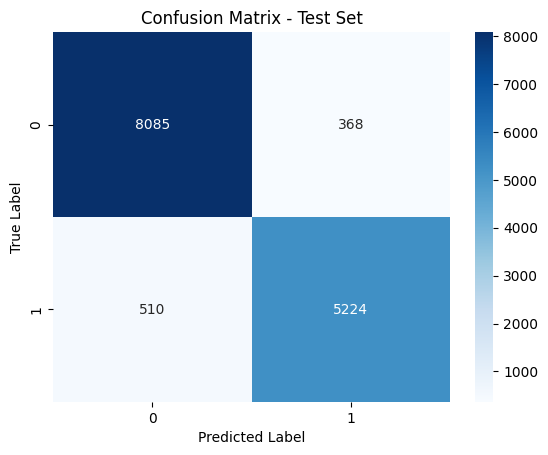

In [39]:
sns.heatmap(confusion_matrix(y_test, res), annot=True, fmt='d', cmap='Blues')

import matplotlib.pyplot as plt
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<hr>

## Saving Model

In [40]:
import pickle
from datetime import datetime

In [42]:
# Saving the trained tokenizer

curr_time = datetime.now().strftime("%Y%m%d_%H%M%S")
tokenizer_name = "my_models/tokenizer_run_" + curr_time
# Note that the "my_models" folder should already be created.
# Else the code will throw an error

with open(tokenizer_name, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [43]:
# Saving the trained model
curr_time = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = "my_models/model_run_" + curr_time + ".h5"

model.save(model_name)

<hr>

## Loading & Testing Model

#### Loading Saved Model

In [44]:
import tensorflow

In [45]:
load_model = tensorflow.keras.models.load_model(model_name)

with open(tokenizer_name, 'rb') as handle:
    load_tokenizer = pickle.load(handle)

#### Testing the Model

In [46]:
test = 'i love Avengers:Infinity War'

def sentence_cleaning(sentence):
    print(sentence)
    sentence = str(sentence).lower() # converts sentence into lower case
    # removes stopwords from sentence
    words = [word for word in sentence.split(' ') if word not in stopword]
    sentence = " ".join(words)
    # extracts rootwords from all words in the sentence
    words = [stemmer.stem(word) for word in sentence.split(' ')]
    sentence = " ".join(words)
    print(sentence)

    sentence = re.sub('\[.*?\]', '', sentence) # removes text inside [] brackets
    sentence = re.sub('https?://\S+www\.\S+', '', sentence) # removes URLs starting with http or https
    sentence = re.sub('<.*?>', '', sentence) # removes HTML Tags
    sentence = re.sub('[%s]' % re.escape(string.punctuation), '', sentence) # removes all punctuations
    sentence = re.sub('\n', '', sentence) # removes all line brakes
    sentence = re.sub('\w*\d\w*', '', sentence) # removes all words that have number in them
    
    return sentence

test = [sentence_cleaning(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print('Prediction', pred)
if pred < 0.5:
    print('No Hate')
else:
    print('Hate')

i love Avengers:Infinity War
love avengers:infin war
['love avengersinfin war']
[[6, 963]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction [[0.0166237]]
No Hate
